<a href="https://colab.research.google.com/github/KatherineValerio/FinalProject/blob/main/finalprojectv1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


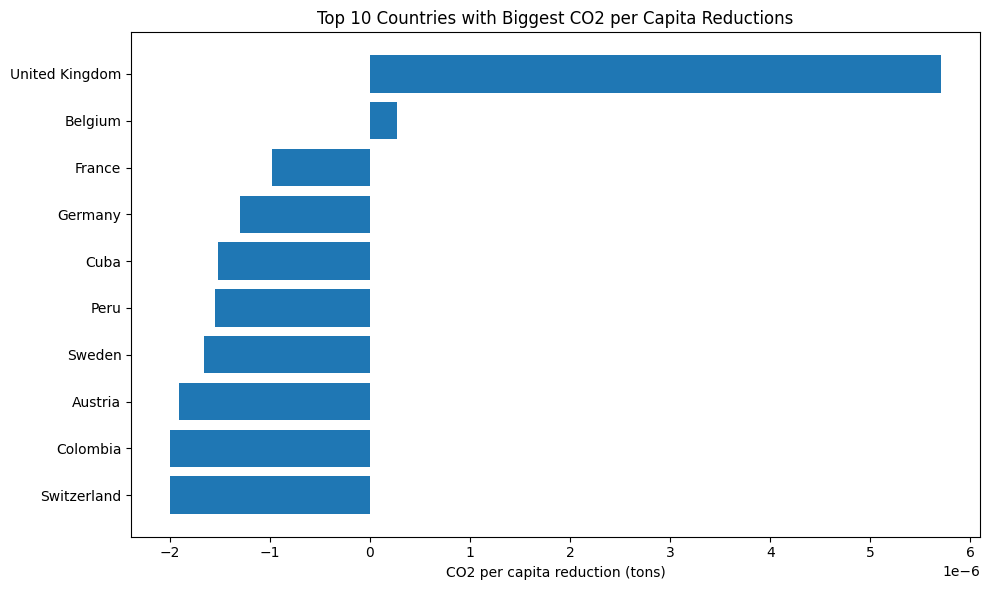

1. United Kingdom: 0.000006 tons per person
2. Belgium: 0.000000 tons per person
3. France: -0.000001 tons per person
4. Germany: -0.000001 tons per person
5. Cuba: -0.000002 tons per person
6. Peru: -0.000002 tons per person
7. Sweden: -0.000002 tons per person
8. Austria: -0.000002 tons per person
9. Colombia: -0.000002 tons per person
10. Switzerland: -0.000002 tons per person


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 1: Load datasets
co2_data = pd.read_csv("/content/drive/MyDrive/owid-co2-data.csv")
co2_data = co2_data[['country','year','co2']]

pop_data = pd.read_csv("/content/drive/MyDrive/owid-energy-data.csv")  # Replace with actual file
pop_data = pop_data[['country','year','population']]

# Step 2: Merge datasets on country and year
df = co2_data.merge(pop_data, on=["country", "year"])

# Step 3: Filter them out
exclude = [
    'World',
    'Upper-middle-income countries',
    'Lower-middle-income countries',
    'Low-income countries',
    'High-income countries',
    'European Union',
    'OECD members',
    'Asia',
    'Africa',
    'North America',
    'South America',
    'Europe',
    'Middle East',
    'International transport'
]

df = df[~df['country'].isin(exclude)]

# Step 4: Find de earliest and latest years in your data
earliest_year = df['year'].min()
latest_year = df['year'].max()

# Step 5: Calculate CO2 per capita
df['co2_per_capita'] = df['co2'] / df['population']

# Create pivot table: countries as rows, years as columns
pivot_df = df.pivot(index='country', columns='year', values='co2_per_capita')

# Calculate the change: earliest - latest
pivot_df['change'] = pivot_df[earliest_year] - pivot_df[latest_year]

# Sort to find the biggest reductions
biggest_strides = pivot_df.sort_values(by='change', ascending=False)

# Show top 10
top10 = biggest_strides[['change']].head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10.index[::-1], top10['change'][::-1])  # Reverse to show biggest on top
plt.xlabel('CO2 per capita reduction (tons)')
plt.title('Top 10 Countries with Biggest CO2 per Capita Reductions')
plt.tight_layout()
plt.show()

# Print top 10 with formatting for report
for i, (country, row) in enumerate(top10.iterrows(), start=1):
    print(f"{i}. {country}: {row['change']:.6f} tons per person")
